In [1]:
#imports
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [29]:
# Read images and labels
images = [os.path.join('datasets/farmbot/raw', x) for x in os.listdir('datasets/farmbot/raw') if x[-3:] == "jpg"]
labels = [os.path.join('datasets/farmbot/raw', x) for x in os.listdir('datasets/farmbot/raw') if x[-3:] == "txt"]

images.sort()
labels.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.2, random_state = 1)
val_images, test_images, val_labels, test_labels = train_test_split(val_images, val_labels, test_size = 0.5, random_state = 1)

In [30]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'datasets/farmbot/images/train')
move_files_to_folder(val_images, 'datasets/farmbot/images/val')
move_files_to_folder(test_images, 'datasets/farmbot/images/test')
move_files_to_folder(train_labels, 'datasets/farmbot/labels/train')
move_files_to_folder(val_labels, 'datasets/farmbot/labels/val')
move_files_to_folder(test_labels, 'datasets/farmbot/labels/test')

In [39]:
!python yolov5/train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch.yaml --batch 10 --epochs 100 --data farmbot.yaml --weights yolov5s.pt --workers 24 --name yolo_plant_det

github: up to date with https://github.com/ultralytics/yolov5 

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=farmbot.yaml, hyp=hyp.scratch.yaml, epochs=100, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=yolov5\runs\train, name=yolo_plant_det, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2021-12-21 torch 1.10.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, cop


Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)

module 'signal' has no attribute 'SIGALRM'
Optimizer stripped from yolov5\runs\train\yolo_plant_det4\weights\last.pt, 14.4MB
Optimizer stripped from yolov5\runs\train\yolo_plant_det4\weights\best.pt, 14.4MB


train: New cache created: datasets\farmbot\labels\train.cache

val: Scanning 'datasets\farmbot\labels\val' images and labels...:   0%|          | 0/10 [00:00<?, ?it/s]
val: Scanning 'datasets\farmbot\labels\val' images and labels...1 found, 0 missing, 0 empty, 0 corrupted:  10%|█         | 1/10 [00:04<00:43,  4.87s/it]
val: Scanning 'datasets\farmbot\labels\val' images and labels...10 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
val: New cache created: datasets\farmbot\labels\val.cache

AutoAnchor: 4.93 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset 
Image sizes 640 train, 640 val
Using 10 dataloader workers
Logging results to yolov5\runs\train\yolo_plant_det4
Starting training for 100 epochs...

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\jelme\anaconda3\envs\labelenv\lib\site-packages\torch\autocast_mode.py:141: UserWarning:

In [41]:
!python yolov5/detect.py --source datasets/farmbot/images/test/ --weights yolov5/runs/train/yolo_plant_det4/weights/best.pt --conf 0.25 --name yolo_plant_det4

detect: weights=['yolov5/runs/train/yolo_plant_det4/weights/best.pt'], source=datasets/farmbot/images/test/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=yolo_plant_det4, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2021-12-21 torch 1.10.1+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/11 C:\Users\jelme\Documents\Avans_stuff\Jaar_4\ML\ML\Project\farmbot\Farmbot Cloud\Machine Learning\datasets\farmbot\images\test\1cd13921-923e-4c05-a629-084ca4110873.jpg: 384x640 3 beets, 2 weeds, Done. (0.140s)
image 2/11 C:\Users\jelme\Documents\Avans_stuff\Jaar_4\ML\ML\Project\farmbot\Farmbot Cloud\Machine Learning\datasets\farmbot\images\test\2cdfd4f1-e378-44c0-ba6b-be2

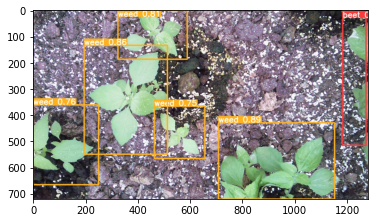

In [44]:
detections_dir = "yolov5/runs/detect/yolo_plant_det4/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))